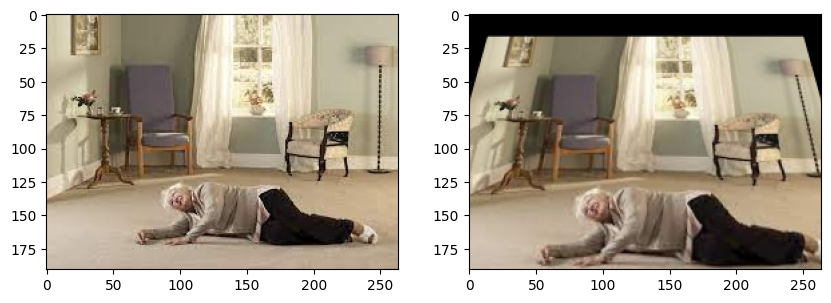

In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as Rot

%matplotlib inline
# Applying Homography on a plane

#Two camera transformation from 1 to 2.
# 20 degree on x direction and 1 meter up (first rotate then translate)
R = Rot.from_euler('xyz', [20, 0, 0], degrees=True)
T = np.array([0.,1.,0.])

img = cv2.imread("test1.jpg")
h,w,_ = img.shape
K = np.array([[1.4*h/2, 0.0, w/2], 
               [0.0, 1.4*w/2, h/2], 
               [0, 0, 1]])  

#plane parameters, 3 meter away from camera
norm = np.array([0, 0, 1])
h = 3.0


def ret_H(norm, h, R, T, K1, K2 = None):
    if K2 is None:
        K2 = K1
    K1inv = np.linalg.inv(K1)
    H = h * K2 @ np.linalg.inv(R) @ K1inv - K2 @ T[:, None] @ norm[None, :] @ K1inv
    return H

def perform_H(img, H):
    img2 = cv2.warpPerspective(img, H, img.shape[1::-1])
    return img2
# H = plane_h * Kdash @ Rtotal @ Kinv
H = ret_H(norm, h, R.as_matrix(), T, K, K)
img2 = perform_H(img, H)

fig, ax = plt.subplots(1,2,figsize=(10,15))
ax[0].imshow(img[..., ::-1])
ax[1].imshow(img2[..., ::-1])
plt.show()